[参考](https://www.kaggle.com/mmetter/pokemon-data-analysis-tutorial)。


这是一个 R 语言版本的教程，供[参考](https://www.kaggle.com/jonathanbouchet/pokemon-battles)。

+ 尝试和预测 Pokimon 的获胜百分比，是一个回归问题。



In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(1)
pokemon = pd.read_csv("../input/pokemon.csv")
pokemon = pokemon.rename(index=str, columns={"#": "Number"})
combat = pd.read_csv("../input/combats.csv")
pokemon.head()

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [2]:
pokemon.shape

(800, 12)

In [3]:
pokemon.Generation.value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [4]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
print("Dimenstions of Pokemon: " + str(pokemon.shape))
print("Dimenstions of Combat: " + str(combat.shape))

Dimenstions of Pokemon: (800, 12)
Dimenstions of Combat: (50000, 3)


In [6]:
pokemon.isnull().sum()

Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
combat.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [8]:
print("This pokemon is after the missing Pokemon: " + pokemon['Name'][63])

This pokemon is after the missing Pokemon: Growlithe


In [9]:
pokemon.loc[62, 'Name'] = "Primeape"

计算每个口袋妖怪的胜率，并且合并到 pokemon 这个数据集里。

In [10]:
# 战斗了 50000 次
combat.shape

(50000, 3)

In [11]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [12]:
type(combat.Winner.value_counts())

pandas.core.series.Series

从战斗数据集中，我们将计算每个口袋妖怪的胜率。希望这可以帮助我们更多地了解哪些口袋妖怪赢了。然后我们可以更深入地尝试并确定哪些统计数据对获胜最有帮助或哪种类型的口袋妖怪获胜最多。我们可以不断增加分析的粒度，以获得更好的理解。然后我们查看数据框的形状并找到一个非常有趣的异常。

一共有 $784$ 只口袋妖怪参加战斗。

In [13]:
# 所有参战的口袋妖怪的编号
all_pokemon_index = np.union1d(combat.First_pokemon.unique(),
                               combat.Second_pokemon.unique())
len(all_pokemon_index)

784

In [14]:
total_Wins = combat.Winner.value_counts()
# 胜利的口袋妖怪的编号
all_pokemon_win_index = total_Wins.index
len(all_pokemon_win_index)

783

发现有 $1$ 只口袋妖怪就从来没有胜利过。把这只口袋妖怪拿出来看看。

In [15]:
never_win_pokemon_index =  np.setdiff1d(all_pokemon_index, all_pokemon_win_index)[0]
never_win_pokemon_index

231

In [16]:
combat_info_for_231 = (
    combat.First_pokemon == never_win_pokemon_index).values | (
        combat.Second_pokemon == never_win_pokemon_index).values
print('{} 场比赛，一场比赛都没有胜利过。'.format(combat[combat_info_for_231].shape[0]))
combat[combat_info_for_231]

135 场比赛，一场比赛都没有胜利过。


,First_pokemon,Second_pokemon,Winner
4,151,231,151
48,231,146,146
70,231,172,172
652,576,231,576
919,231,209,209
1078,199,231,199
1397,198,231,198
1613,635,231,635
2042,231,703,703
2223,231,581,581


In [17]:
pokemon[pokemon.Number == never_win_pokemon_index]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,231.0,Shuckle,Bug,Rock,20.0,10.0,230.0,10.0,230.0,5.0,2.0,False


In [18]:
pokemon.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [19]:
# 各个口袋妖怪胜利的次数
numberOfWins = combat.groupby('Winner').count()
numberOfWins.head()

,First_pokemon,Second_pokemon
Winner,,
1,37,37
2,46,46
3,89,89
4,70,70
5,55,55


In [20]:
# both methods produce the same results
countByFirst = combat.groupby('Second_pokemon').count()
countByFirst.head()

,First_pokemon,Winner
Second_pokemon,,
1,63,63
2,66,66
3,64,64
4,63,63
5,62,62


In [21]:
countBySecond = combat.groupby('First_pokemon').count()
countBySecond.head()

,Second_pokemon,Winner
First_pokemon,,
1,70,70
2,55,55
3,68,68
4,62,62
5,50,50


In [22]:
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


In [23]:
# 集合的差，即元素在 x 中且不在 y 中
# offset because the index and number are off by one
find_losing_pokemon = np.setdiff1d(countByFirst.index.values,
                                   numberOfWins.index.values) - 1
find_losing_pokemon

array([230])

In [24]:
losing_pokemon = pokemon.iloc[find_losing_pokemon[0], ]
print(losing_pokemon)

Number            231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object


In [25]:
numberOfWins = numberOfWins.sort_index()
numberOfWins

,First_pokemon,Second_pokemon
Winner,,
1,37,37
2,46,46
3,89,89
4,70,70
5,55,55
6,64,64
7,115,115
8,119,119
9,114,114


In [26]:
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage'] = numberOfWins.First_pokemon / numberOfWins['Total Fights']

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
results2 = pd.merge(pokemon, numberOfWins, right_index=True, left_on='Number') # 内连接
results3 = pd.merge(pokemon, numberOfWins, right_index=True, left_on='Number', how='left') # 左连接

# We can look at the difference between the two datasets to see which pokemon never recorded a fight
# missing_Pokemon = np.setdiff1d(pokemon.index.values, results3.index.values)
# subset the dataframe where pokemon win percent is NaN
# 看看哪些口袋妖怪没有参与战斗
results3[results3['Win Percentage'].isnull()]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
11,12.0,Blastoise,Water,NaN,79.0,83.0,100.0,85.0,105.0,78.0,1.0,False,NaN,NaN,NaN,NaN
32,33.0,Sandshrew,Ground,NaN,50.0,75.0,85.0,20.0,30.0,40.0,1.0,False,NaN,NaN,NaN,NaN
45,46.0,Wigglytuff,Normal,Fairy,140.0,70.0,45.0,85.0,50.0,45.0,1.0,False,NaN,NaN,NaN,NaN
65,66.0,Poliwag,Water,NaN,40.0,50.0,40.0,40.0,40.0,90.0,1.0,False,NaN,NaN,NaN,NaN
77,78.0,Victreebel,Grass,Poison,80.0,105.0,65.0,100.0,70.0,70.0,1.0,False,NaN,NaN,NaN,NaN
89,90.0,Magneton,Electric,Steel,50.0,60.0,95.0,120.0,70.0,70.0,1.0,False,NaN,NaN,NaN,NaN
143,144.0,Ditto,Normal,NaN,48.0,48.0,48.0,48.0,48.0,48.0,1.0,False,NaN,NaN,NaN,NaN
182,183.0,Ariados,Bug,Poison,70.0,90.0,70.0,60.0,60.0,40.0,2.0,False,NaN,NaN,NaN,NaN
230,231.0,Shuckle,Bug,Rock,20.0,10.0,230.0,10.0,230.0,5.0,2.0,False,NaN,NaN,NaN,NaN
235,236.0,Ursaring,Normal,NaN,90.0,130.0,75.0,75.0,75.0,55.0,2.0,False,NaN,NaN,NaN,NaN


In [27]:
# https://developer.mozilla.org/zh-CN/docs/Web/JavaScript/Reference/Global_Objects/Number/isFinite
# np.isfinite 是否有限，如果是 nan 返回 false，https://docs.scipy.org/doc/numpy/reference/generated/numpy.isfinite.html
# 参加战斗的口袋妖怪胜率（升序排列）
results3[np.isfinite(results3['Win Percentage'])].sort_values(by=['Win Percentage']).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
289,290.0,Silcoon,Bug,NaN,50.0,35.0,55.0,25.0,25.0,15.0,3.0,False,3.0,3.0,138.0,0.021739
189,190.0,Togepi,Fairy,NaN,35.0,20.0,65.0,40.0,65.0,20.0,2.0,False,3.0,3.0,122.0,0.024590
638,639.0,Solosis,Psychic,NaN,45.0,30.0,40.0,105.0,50.0,20.0,5.0,False,4.0,4.0,129.0,0.031008
236,237.0,Slugma,Fire,NaN,40.0,40.0,40.0,70.0,40.0,20.0,2.0,False,4.0,4.0,123.0,0.032520
576,577.0,Munna,Psychic,NaN,76.0,25.0,45.0,67.0,55.0,24.0,5.0,False,5.0,5.0,128.0,0.039062
188,189.0,Igglybuff,Normal,Fairy,90.0,30.0,15.0,40.0,20.0,15.0,2.0,False,5.0,5.0,115.0,0.043478
394,395.0,Wynaut,Psychic,NaN,95.0,23.0,48.0,23.0,48.0,23.0,3.0,False,6.0,6.0,130.0,0.046154
209,210.0,Wooper,Water,Ground,55.0,45.0,45.0,25.0,25.0,15.0,2.0,False,6.0,6.0,125.0,0.048000
291,292.0,Cascoon,Bug,NaN,50.0,35.0,55.0,25.0,25.0,15.0,3.0,False,7.0,7.0,133.0,0.052632
752,753.0,Spritzee,Fairy,NaN,78.0,52.0,60.0,63.0,65.0,23.0,6.0,False,8.0,8.0,133.0,0.060150


In [28]:
# 参加战斗的口袋妖怪胜率（降序排列）
results3[np.isfinite(results3['Win Percentage'])].sort_values(by=['Win Percentage'], ascending=False).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
154,155.0,Mega Aerodactyl,Rock,Flying,80.0,135.0,85.0,70.0,95.0,150.0,1.0,False,127.0,127.0,129.0,0.984496
512,513.0,Weavile,Dark,Ice,70.0,120.0,65.0,45.0,85.0,125.0,4.0,False,116.0,116.0,119.0,0.974790
703,704.0,Tornadus Therian Forme,Flying,NaN,79.0,100.0,80.0,110.0,90.0,121.0,5.0,True,121.0,121.0,125.0,0.968000
19,20.0,Mega Beedrill,Bug,Poison,65.0,150.0,40.0,15.0,80.0,145.0,1.0,False,115.0,115.0,119.0,0.966387
153,154.0,Aerodactyl,Rock,Flying,80.0,105.0,65.0,60.0,75.0,130.0,1.0,False,136.0,136.0,141.0,0.964539
476,477.0,Mega Lopunny,Normal,Fighting,65.0,136.0,94.0,54.0,96.0,135.0,4.0,False,124.0,124.0,129.0,0.961240
726,727.0,Greninja,Water,Dark,72.0,95.0,67.0,103.0,71.0,122.0,6.0,False,122.0,122.0,127.0,0.960630
716,717.0,Meloetta Pirouette Forme,Normal,Fighting,100.0,128.0,90.0,77.0,77.0,128.0,5.0,False,118.0,118.0,123.0,0.959350
164,165.0,Mega Mewtwo Y,Psychic,NaN,106.0,150.0,70.0,194.0,120.0,140.0,1.0,True,119.0,119.0,125.0,0.952000
349,350.0,Mega Sharpedo,Water,Dark,70.0,140.0,70.0,110.0,65.0,105.0,3.0,False,114.0,114.0,120.0,0.950000


In [29]:
results3.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,First_pokemon,Second_pokemon,Total Fights,Win Percentage
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,63.856960,63.856960,127.541507,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,32.925941,32.925941,11.397402,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,3.000000,3.000000,92.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,36.000000,36.000000,120.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,62.000000,62.000000,128.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,91.000000,91.000000,135.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,152.000000,152.000000,164.000000,0.984496


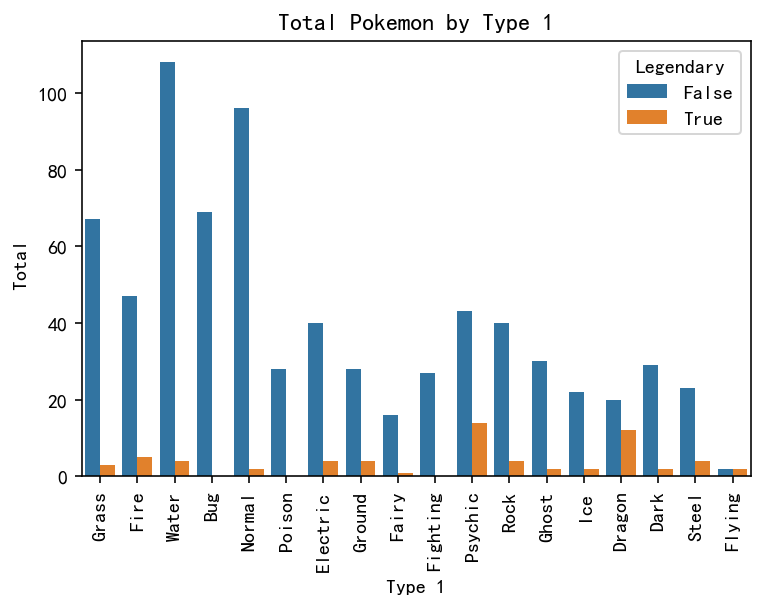

In [30]:
import matplotlib.pyplot as plt

sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=results3)
# f.set_xticklabels(rotation=30)
plt.xticks(rotation=90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")
plt.show()

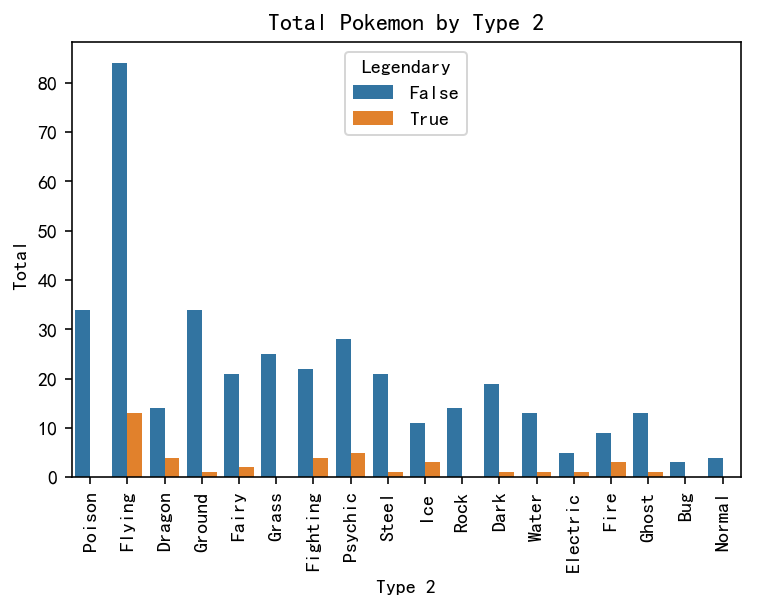

In [31]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=results3)
plt.xticks(rotation=90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")
plt.show()

In [32]:
results3.groupby('Type 1').agg({
    "Win Percentage": "mean"
}).sort_values(by="Win Percentage")

,Win Percentage
Type 1,
Fairy,0.329300
Rock,0.404852
Steel,0.424529
Poison,0.433262
Bug,0.439006
Ice,0.439604
Grass,0.440364
Water,0.469357
Fighting,0.475616


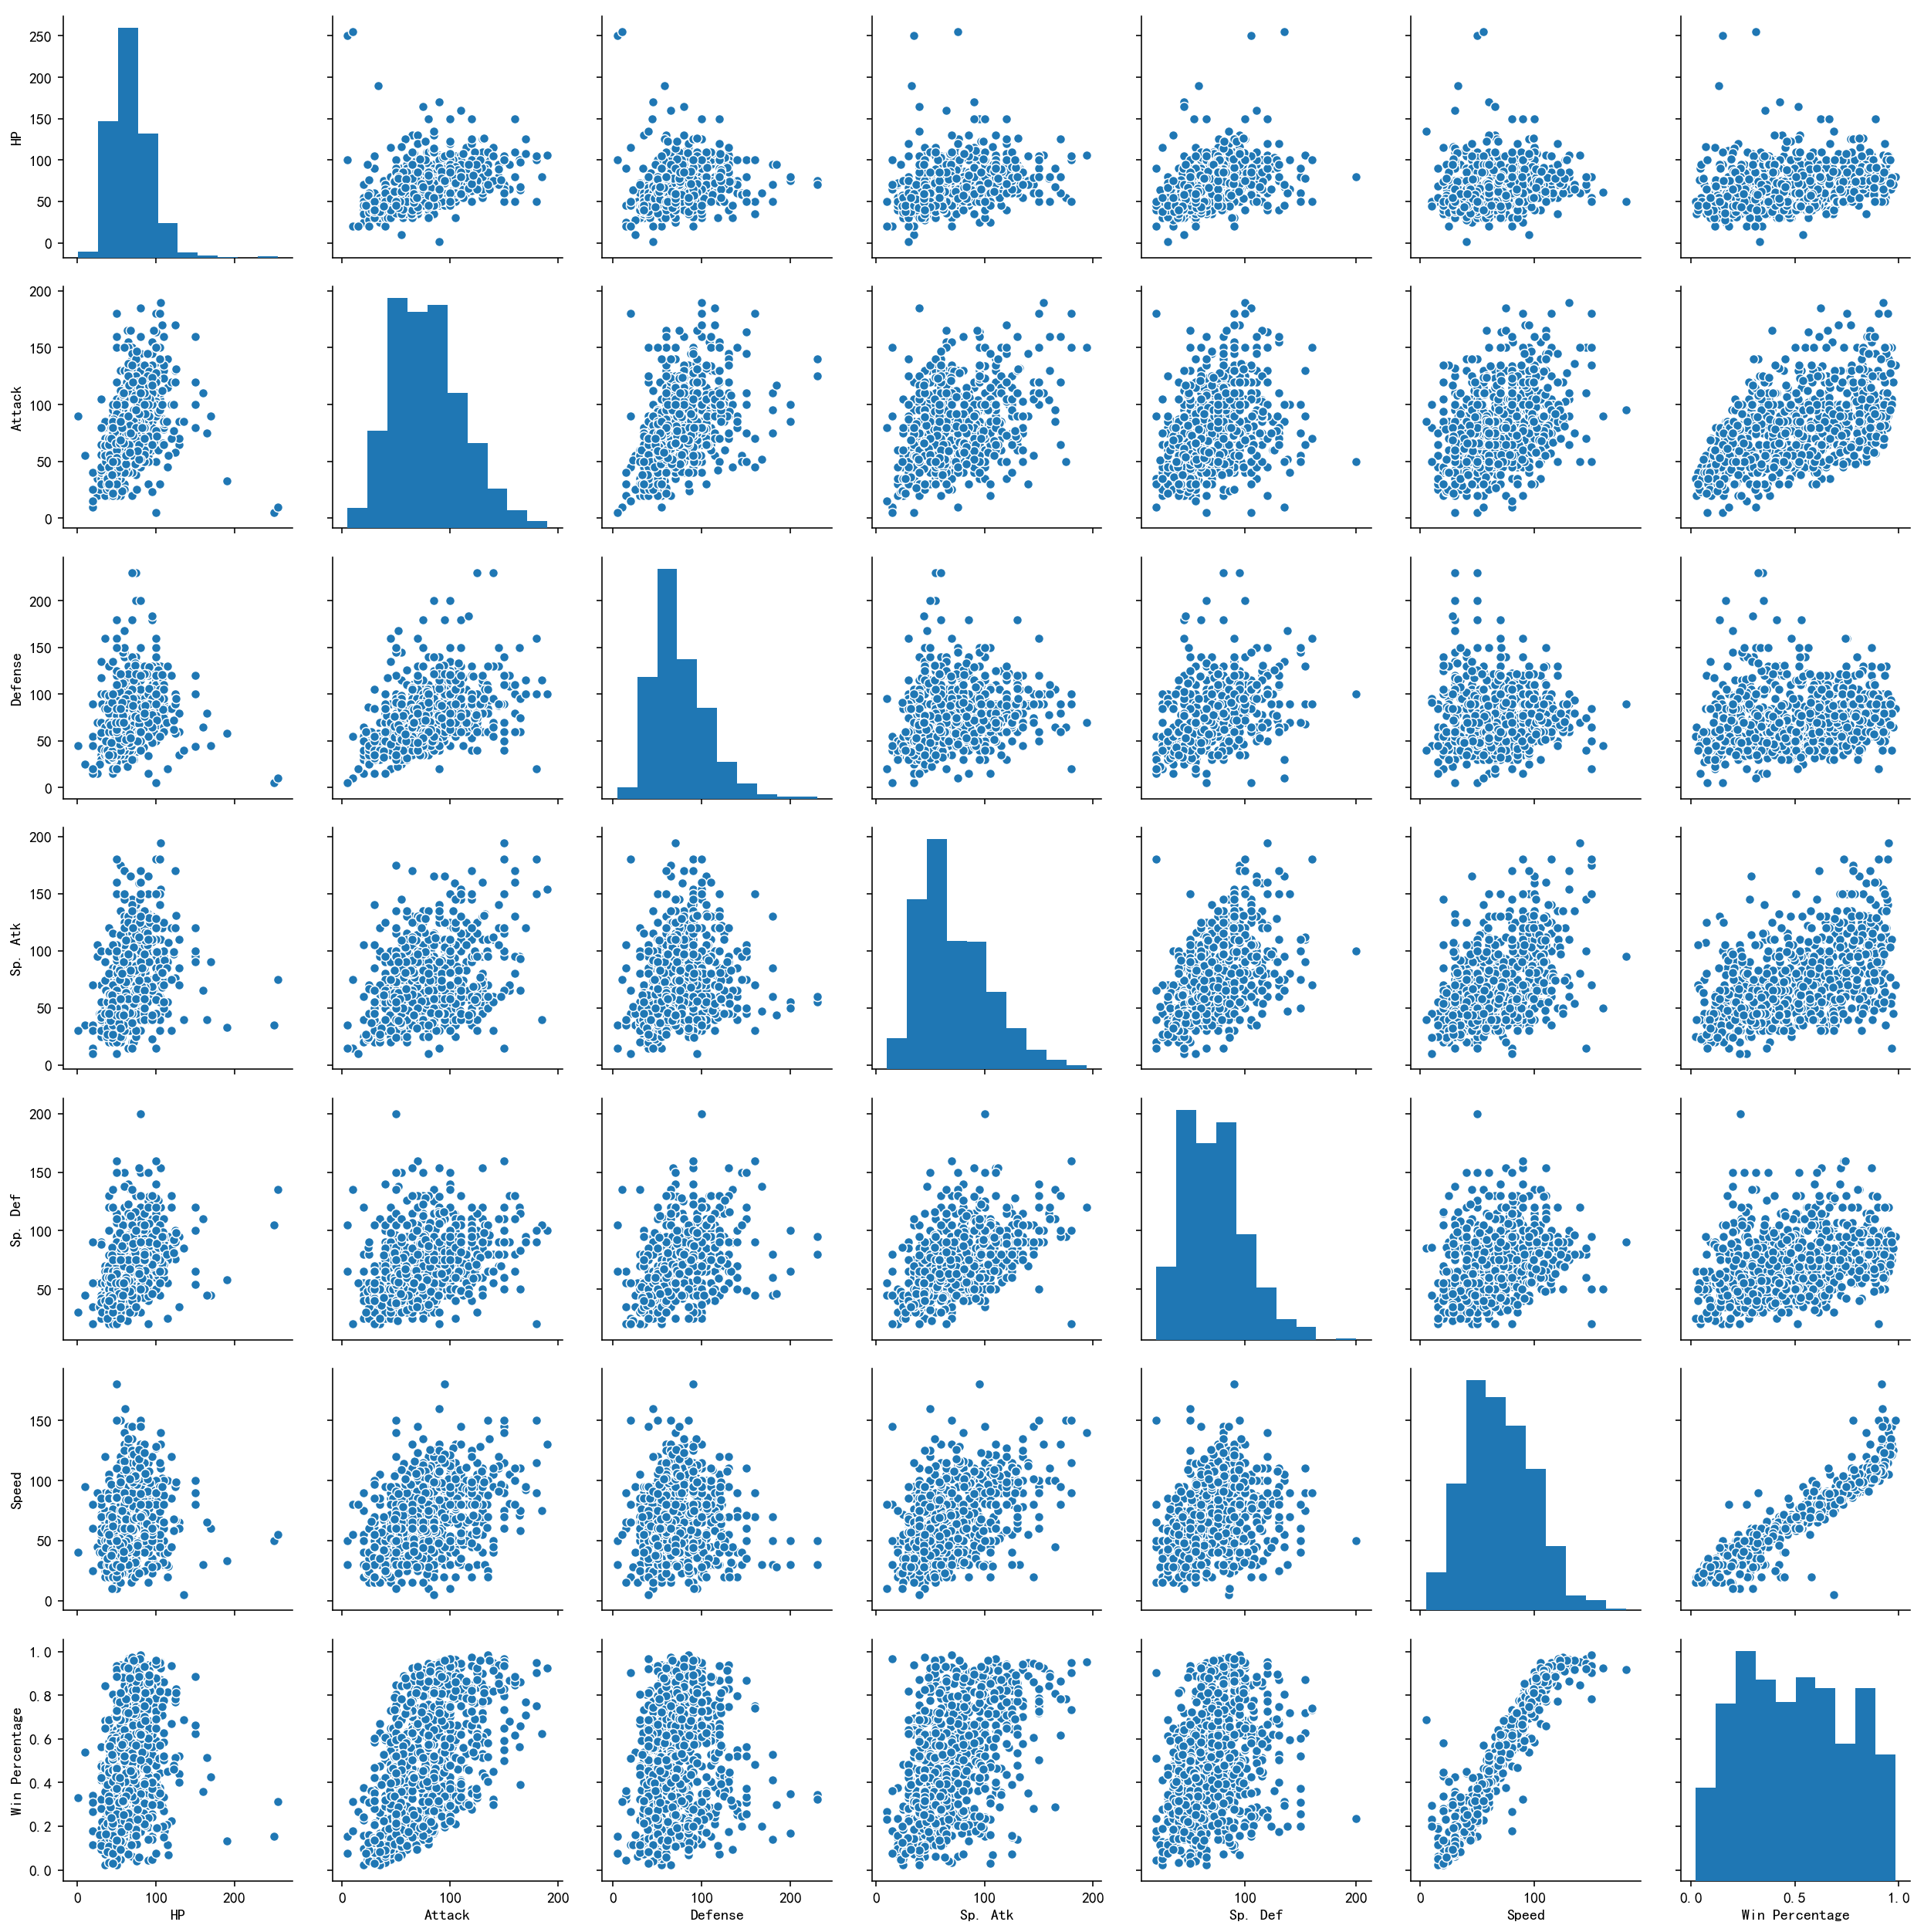

In [33]:
# sns.distplot(results3["Win Percentage"].dropna(), bins=20)
# 'Type 1' 这里些什么都行
col = [
    'Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
    'Win Percentage'
]
# results3.loc[:,'HP':'Speed'].corr()
sns.pairplot(results3.loc[:, col].dropna())
plt.show()

很明显地看出，速度和胜率是正线性相关的关系。

/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in less
  inside = (self.l

/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No

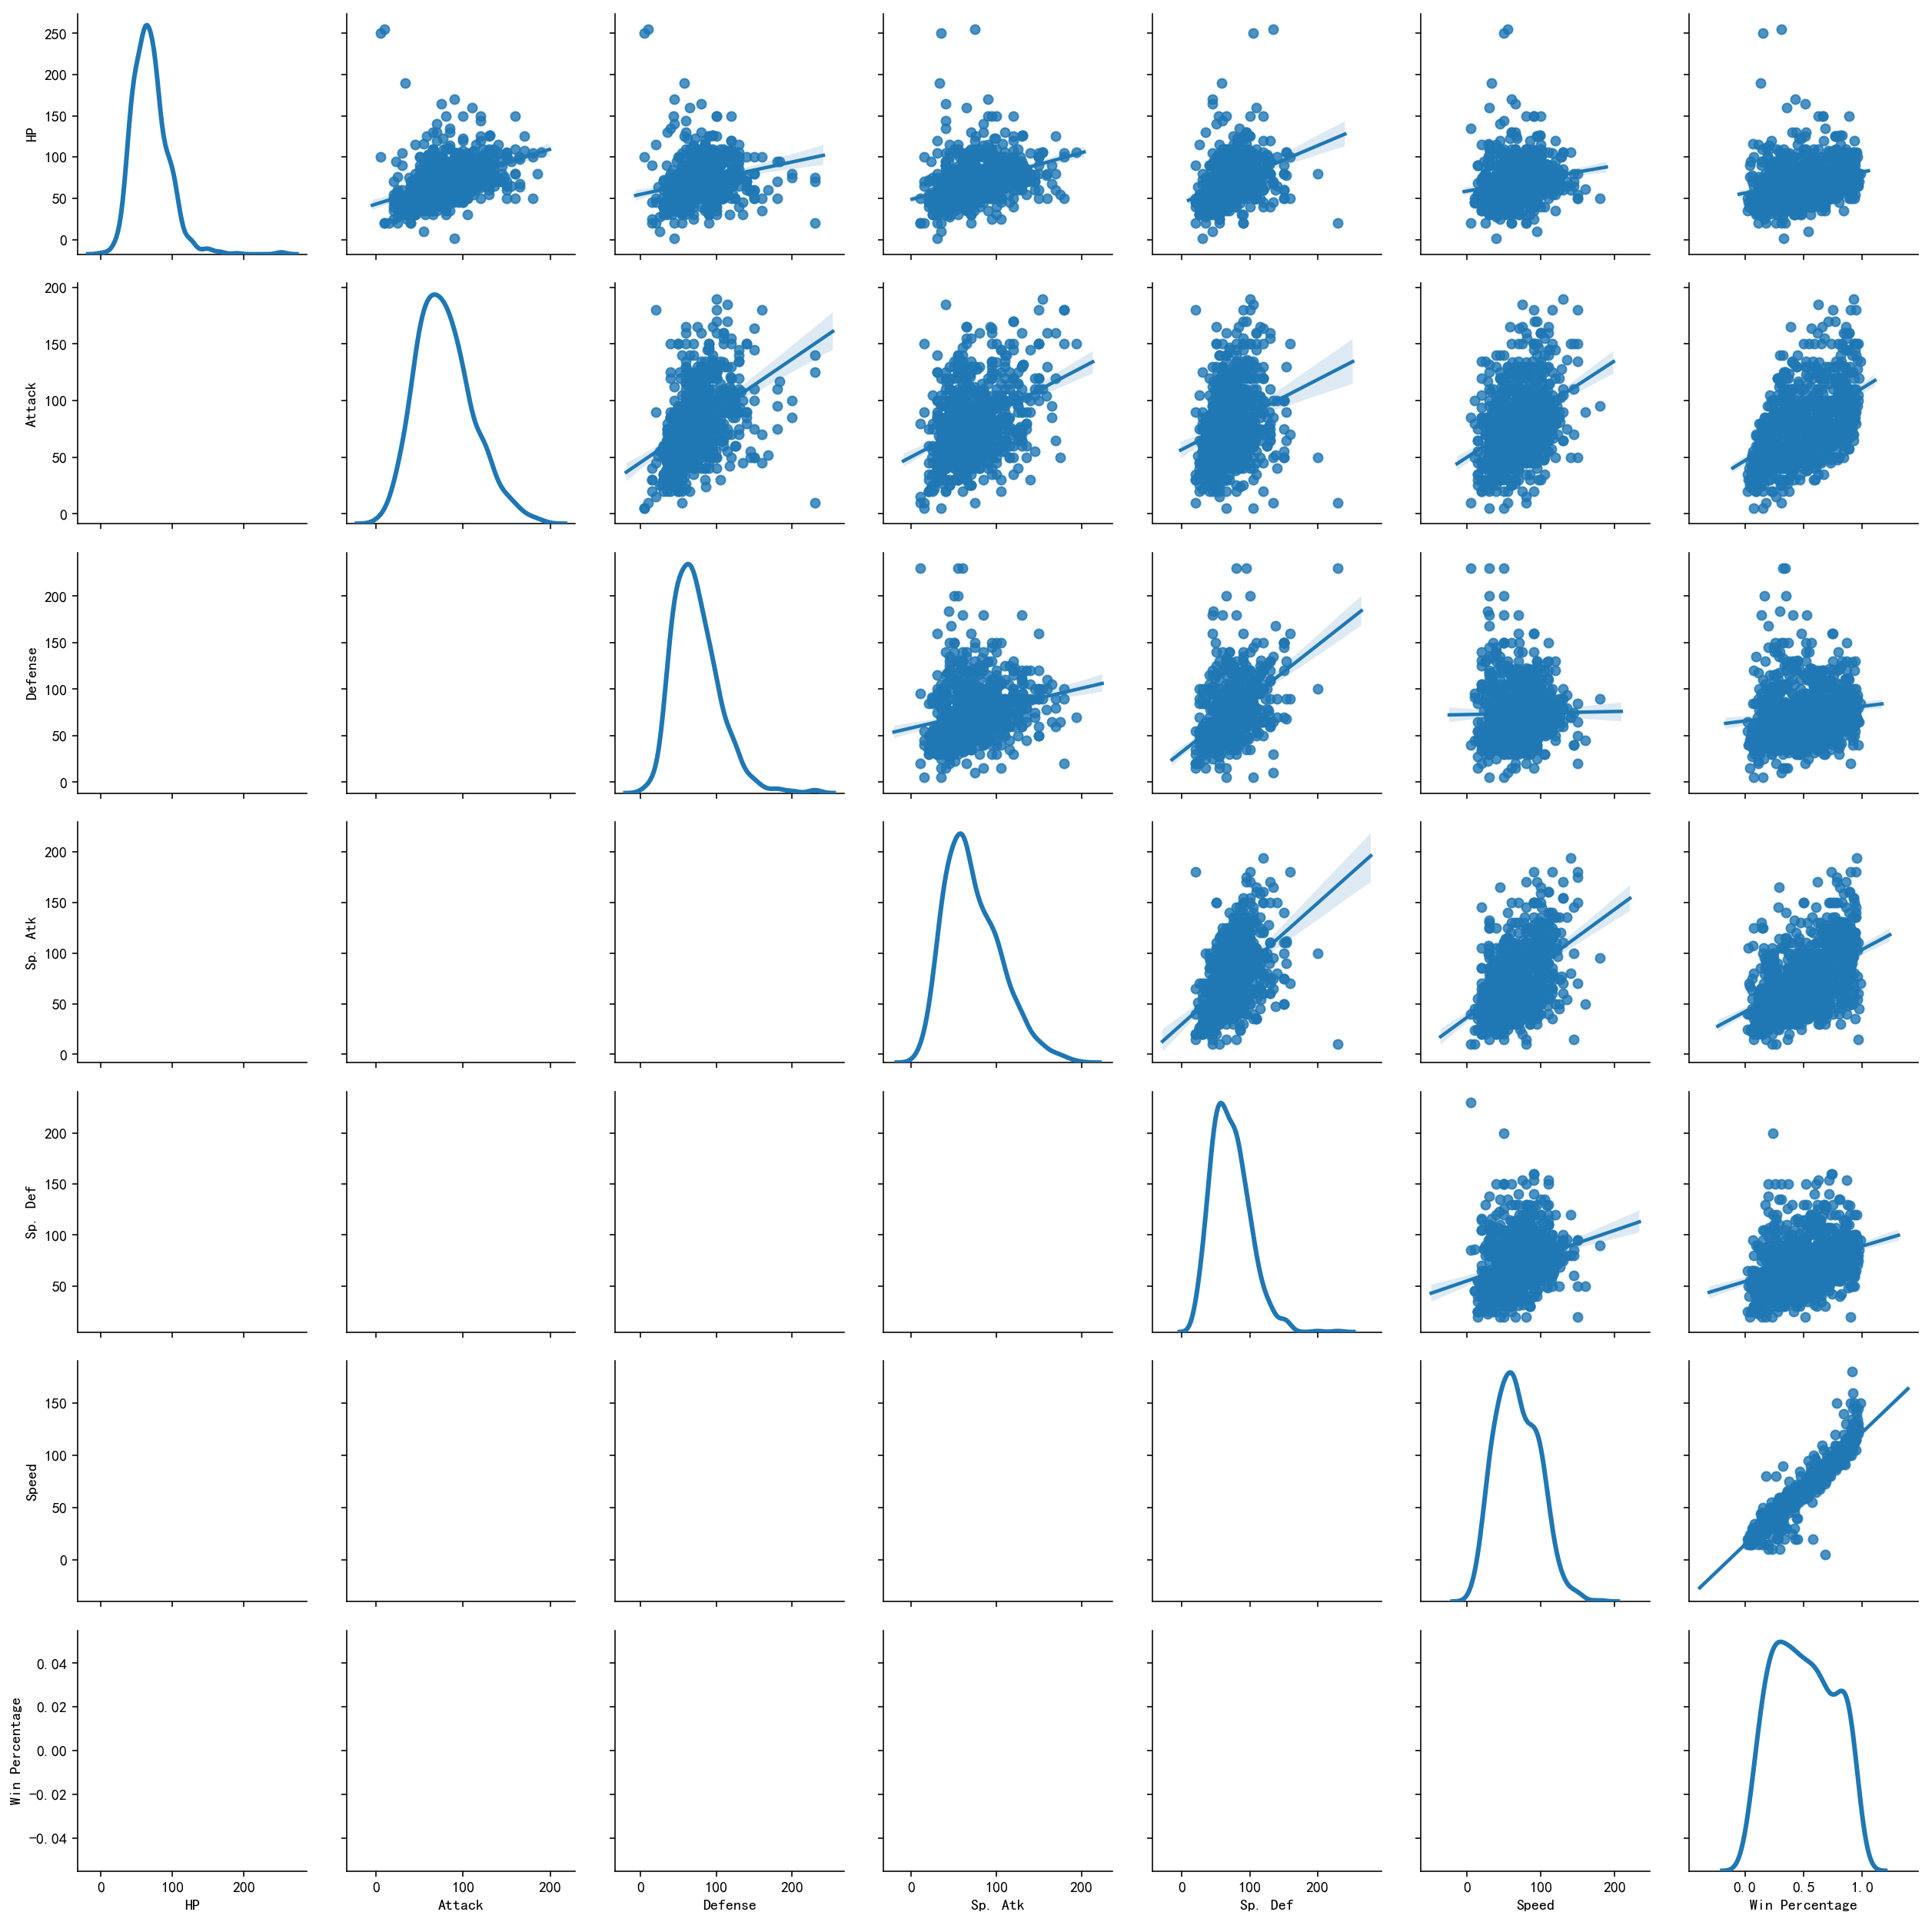

In [34]:
import matplotlib.pyplot as plt

g = sns.PairGrid(results3.loc[:, col], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

In [35]:
results3.loc[:, col].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win Percentage
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.258006
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.500181
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.129426
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.478940
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.324218
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.937742
Win Percentage,0.258006,0.500181,0.129426,0.478940,0.324218,0.937742,1.000000


### 绘制相关系数矩阵

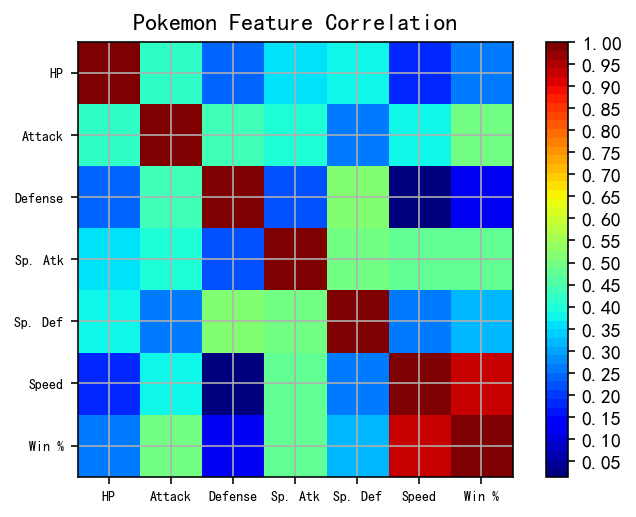

In [36]:
# https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
# This function was taken from the link above
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Pokemon Feature Correlation')
    labels = [
        'Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
        'Win %'
    ]
    ax1.set_xticklabels(labels, fontsize=7)
    ax1.set_yticklabels(labels, fontsize=7)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(
        cax,
        ticks=[
            0.00, .05, .10, .15, .20, .25, .30, .35, .40, .45, .50, .55, .60,
            .65, .70, .75, .8, .85, .90, .95, 1
        ])
    plt.show()


correlation_matrix(results3.loc[:, col])

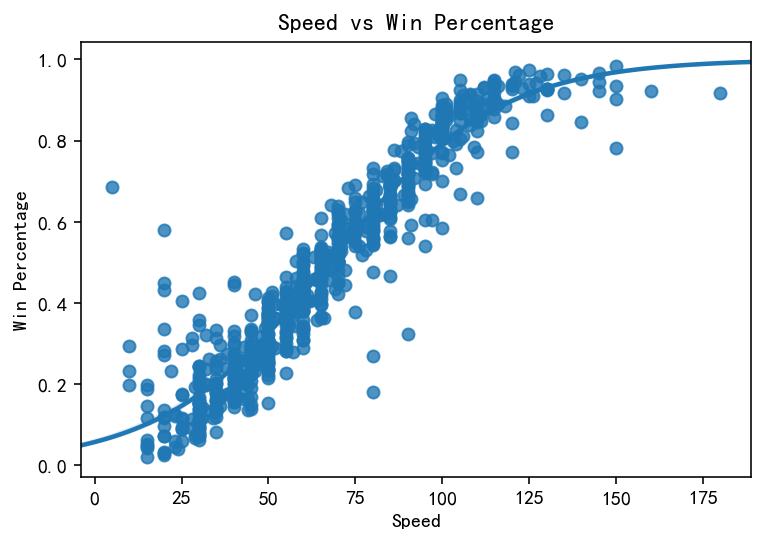

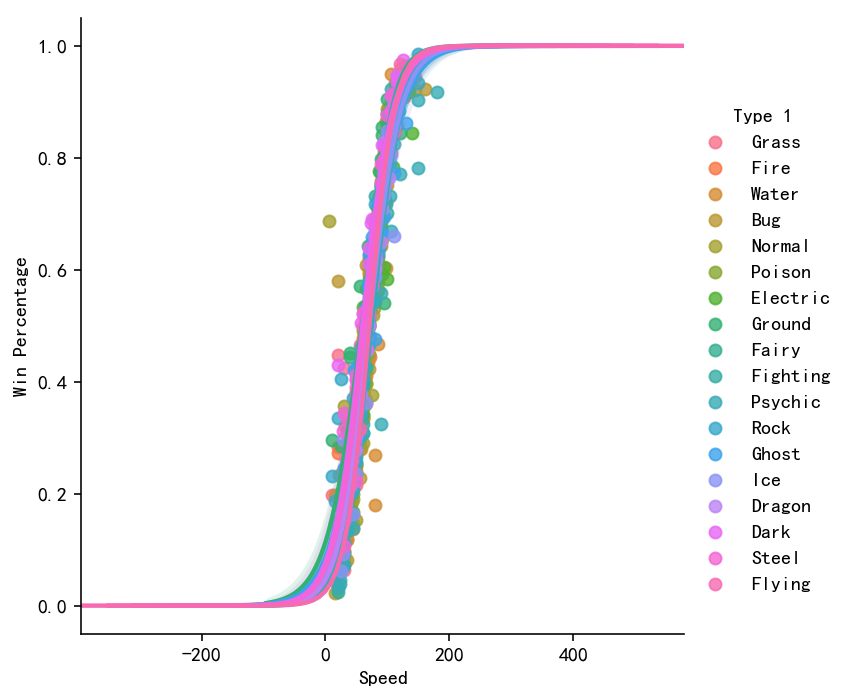

In [37]:
import matplotlib.pyplot as plt

# f, (ax1, ax2) = plt.subplots(1,2)
sns.regplot(
    x="Speed", y="Win Percentage", data=results3,
    logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(
    x="Speed", y="Win Percentage", data=results3, hue='Type 1',
    logistic=True)  #.set_title("Speed vs Win Percentage")
plt.show()

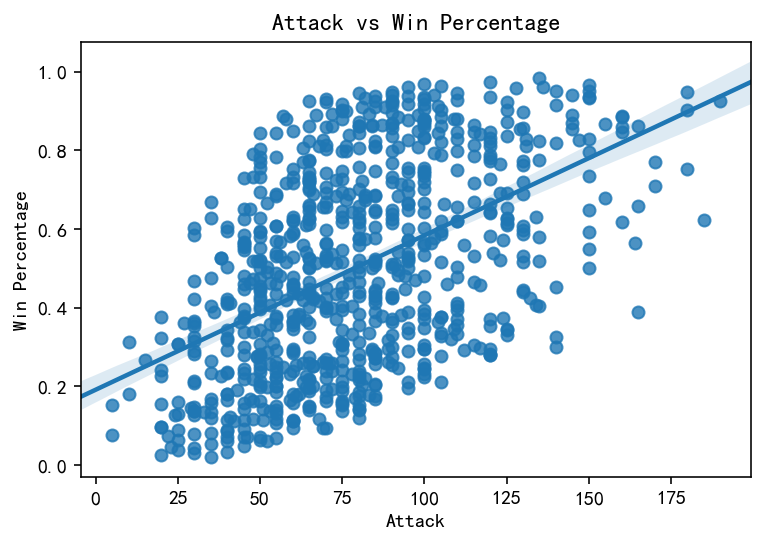

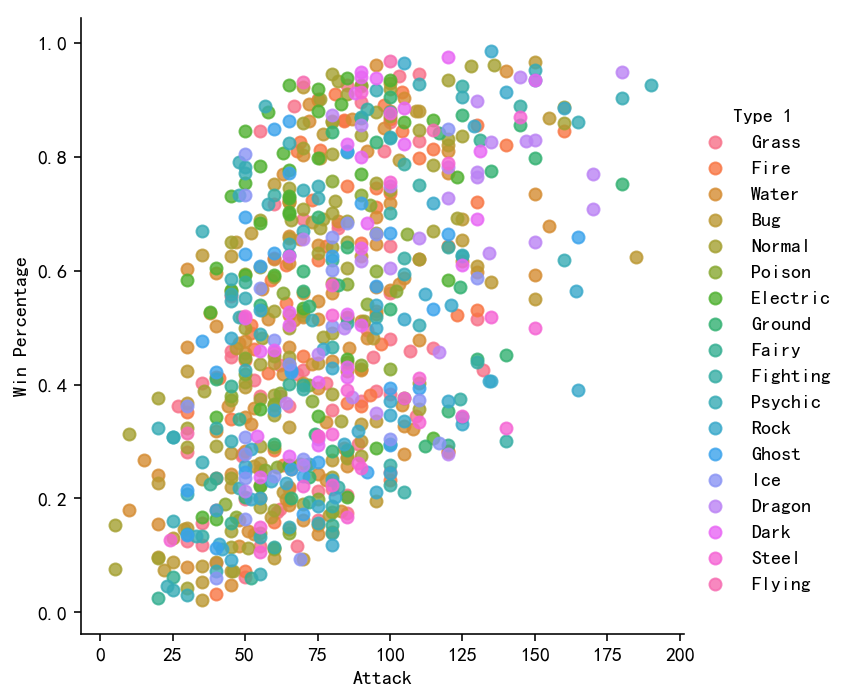

In [38]:
ax = sns.regplot(
    x="Attack", y="Win Percentage",
    data=results3).set_title("Attack vs Win Percentage")
sns.lmplot(
    x="Attack", y="Win Percentage", data=results3, hue='Type 1', fit_reg=False)
plt.show()

In [39]:
dataset = results2

In [40]:
# remove rows with NA values because it will cause errors when fitting to the model
dataset.dropna(axis=0, how='any')

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
0,1.0,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,37,37,133,0.278195
1,2.0,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,46,46,121,0.380165
2,3.0,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,89,89,132,0.674242
3,4.0,Mega Venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,70,70,125,0.560000
6,7.0,Charizard,Fire,Flying,78.0,84.0,78.0,109.0,85.0,100.0,1.0,False,115,115,133,0.864662
7,8.0,Mega Charizard X,Fire,Dragon,78.0,130.0,111.0,130.0,85.0,100.0,1.0,False,119,119,139,0.856115
8,9.0,Mega Charizard Y,Fire,Flying,78.0,104.0,78.0,159.0,115.0,100.0,1.0,False,114,114,135,0.844444
15,16.0,Butterfree,Bug,Flying,60.0,45.0,50.0,90.0,80.0,70.0,1.0,False,75,75,120,0.625000
16,17.0,Weedle,Bug,Poison,40.0,35.0,30.0,20.0,20.0,50.0,1.0,False,26,26,111,0.234234
17,18.0,Kakuna,Bug,Poison,45.0,25.0,50.0,25.0,25.0,35.0,1.0,False,17,17,130,0.130769


In [41]:
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, 5:11].values
y = dataset.iloc[:, 15].values

In [42]:
dataset.iloc[:, 5:11]

,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,49.0,49.0,65.0,65.0,45.0,1.0
1,62.0,63.0,80.0,80.0,60.0,1.0
2,82.0,83.0,100.0,100.0,80.0,1.0
3,100.0,123.0,122.0,120.0,80.0,1.0
4,52.0,43.0,60.0,50.0,65.0,1.0
5,64.0,58.0,80.0,65.0,80.0,1.0
6,84.0,78.0,109.0,85.0,100.0,1.0
7,130.0,111.0,130.0,85.0,100.0,1.0
8,104.0,78.0,159.0,115.0,100.0,1.0
9,48.0,65.0,50.0,64.0,43.0,1.0


In [43]:
dataset

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
0,1.0,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,37,37,133,0.278195
1,2.0,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,46,46,121,0.380165
2,3.0,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,89,89,132,0.674242
3,4.0,Mega Venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,70,70,125,0.560000
4,5.0,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,55,55,112,0.491071
5,6.0,Charmeleon,Fire,NaN,58.0,64.0,58.0,80.0,65.0,80.0,1.0,False,64,64,118,0.542373
6,7.0,Charizard,Fire,Flying,78.0,84.0,78.0,109.0,85.0,100.0,1.0,False,115,115,133,0.864662
7,8.0,Mega Charizard X,Fire,Dragon,78.0,130.0,111.0,130.0,85.0,100.0,1.0,False,119,119,139,0.856115
8,9.0,Mega Charizard Y,Fire,Flying,78.0,104.0,78.0,159.0,115.0,100.0,1.0,False,114,114,135,0.844444
9,10.0,Squirtle,Water,NaN,44.0,48.0,65.0,50.0,64.0,43.0,1.0,False,19,19,117,0.162393


In [44]:
dataset.iloc[:, 15] # Win Percentage 这一列

0      0.278195
1      0.380165
2      0.674242
3      0.560000
4      0.491071
5      0.542373
6      0.864662
7      0.856115
8      0.844444
9      0.162393
10     0.418440
12     0.576389
13     0.147826
14     0.097744
15     0.625000
16     0.234234
17     0.130769
18     0.625000
19     0.966387
20     0.373016
21     0.528926
22     0.861538
23     0.944444
24     0.481481
25     0.721429
26     0.449275
27     0.837398
28     0.366412
29     0.576000
30     0.683824
         ...   
769    0.462121
770    0.401639
771    0.884298
772    0.879032
773    0.257143
774    0.213675
775    0.453846
776    0.603774
777    0.573770
778    0.239130
779    0.393333
780    0.426087
782    0.421488
783    0.251908
784    0.718750
785    0.809917
786    0.572581
787    0.393939
788    0.093023
789    0.297521
790    0.314961
791    0.930435
792    0.829457
793    0.810219
794    0.747664
795    0.371429
796    0.885496
797    0.504202
798    0.618056
799    0.619835
Name: Win Percentage, Le

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [46]:
def ml_linearreg(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    return mae


ml_linearreg(X_train, X_test, y_train, y_test)

0.9076142320040209


0.06143408809230802

In [47]:
def ml_svm(X_train, X_test, y_train, y_test):
    from sklearn.svm import SVR
    regressor = SVR(kernel='linear')
    regressor.fit(X_train, y_train)
    print('R^2 = ', regressor.score(X_train, y_train))

    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    return mae


ml_svm(X_train, X_test, y_train, y_test)

R^2 =  0.9065078337237095


0.06360099438357145

In [48]:
def ml_decisiontree(X_train, X_test, y_train, y_test):
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)
    print('R^2 = ', regressor.score(X_train, y_train))

    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    return mae


ml_decisiontree(X_train, X_test, y_train, y_test)

R^2 =  0.9997364298486605


0.05381006518627112

In [50]:
# no feature scaling needed
def ml_randomforest(X_train, X_test, y_train, y_test):
    # Fitting Random Forest Regression to the dataset
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators=10, random_state=0)
    regressor.fit(X_train, y_train)
    print('R^2 = ', regressor.score(X_train, y_train))

    # Predicting a new result
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error: " + str(mae))
    return mae


ml_randomforest(X_train, X_test, y_train, y_test)

R^2 =  0.9900335696113418
Mean Absolute Error: 0.04998334826451492


0.04998334826451492

In [51]:
def ml_xgboost(X_train, X_test, y_train, y_test):
    import xgboost
    xgb = xgboost.XGBRegressor(
        n_estimators=100,
        learning_rate=0.08,
        gamma=0,
        subsample=0.75,
        colsample_bytree=1,
        max_depth=7)
    xgb.fit(X_train, y_train)
    print('R^2 = ', xgb.score(X_train, y_train))
    y_pred = xgb.predict(X_test)
    # print(explained_variance_score(y_pred ,y_test))
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error: " + str(mae))
    return mae


ml_xgboost(X_train, X_test, y_train, y_test)

R^2 =  0.9973088078582824
Mean Absolute Error: 0.049180133683086116


0.049180133683086116

In [52]:
# store all the ML results in an array
all_stats = [
    ml_linearreg(X_train, X_test, y_train, y_test),
    ml_svm(X_train, X_test, y_train, y_test),
    ml_decisiontree(X_train, X_test, y_train, y_test),
    ml_randomforest(X_train, X_test, y_train, y_test),
    ml_xgboost(X_train, X_test, y_train, y_test)
]
# all_stats

0.9076142320040209
R^2 =  0.9065078337237095
R^2 =  0.9997364298486605
R^2 =  0.9900335696113418
Mean Absolute Error: 0.04998334826451492
R^2 =  0.9973088078582824
Mean Absolute Error: 0.049180133683086116


## PCA

PCA 之前调整均值和方差。

In [54]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# Provides a vector of the variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("This is the variance explained by the principle components")
print(explained_variance)

# loadings vectors
print(pca.components_.T * np.sqrt(pca.explained_variance_))

This is the variance explained by the principle components
[0.41314124 0.17695566 0.16108936]
[[ 0.72334311  0.04704826  0.01354683]
 [ 0.65312406  0.53681752  0.38706868]
 [ 0.76857559 -0.23752969 -0.16701873]
 [ 0.7612853   0.14694063  0.16282222]
 [ 0.60047876 -0.57010813 -0.36837484]
 [ 0.04667732  0.60828526 -0.79244597]]


In [56]:
# run PCA transformed data on ML algos
PCA = [
    ml_linearreg(X_train, X_test, y_train, y_test),
    ml_svm(X_train, X_test, y_train, y_test),
    ml_decisiontree(X_train, X_test, y_train, y_test),
    ml_randomforest(X_train, X_test, y_train, y_test),
    ml_xgboost(X_train, X_test, y_train, y_test)
]
PCA

0.7536920624122643
R^2 =  0.7526006202792482
R^2 =  0.99973644025325
R^2 =  0.9602173159076051
Mean Absolute Error: 0.09675725426079046
R^2 =  0.9845764846202227
Mean Absolute Error: 0.09435562659990587


[0.09993739565447234,
 0.09998992822143174,
 0.12774044378891386,
 0.09675725426079046,
 0.09435562659990587]

## 只用两个最相关的特征做预测

In [57]:
# reduce the features to only speed and attack.
dataset = results2
dataset.dropna(axis=0, how='any')
# Splitting the dataset into the Training set and Test set
X = dataset.loc[:, ['Attack', 'Speed']].values
y = dataset.loc[:, ['Win Percentage']].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

#ml_linearreg(X_train, X_test, y_train, y_test)
#ml_svm(X_train, X_test, y_train, y_test)
#ml_decisiontree(X_train, X_test, y_train, y_test)
#ml_randomforest(X_train, X_test, y_train, y_test)
#ml_xgboost(X_train, X_test, y_train, y_test)

reduced_stats = [
    ml_linearreg(X_train, X_test, y_train, y_test),
    ml_svm(X_train, X_test, y_train, y_test),
    ml_decisiontree(X_train, X_test, y_train, y_test),
    ml_randomforest(X_train, X_test, y_train, y_test),
    ml_xgboost(X_train, X_test, y_train, y_test)
]

0.9049921104553327


/Users/liwei/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 =  0.9040040161126808
R^2 =  0.9930604360712907
R^2 =  0.9859902601183322
Mean Absolute Error: 0.04936933796499648
R^2 =  0.9881858154619502
Mean Absolute Error: 0.04940874120745903


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [61]:
ml_results

,All Factors,Reduced Factors,PCA
0,0.061434,0.062812,0.099937
1,0.063601,0.064739,0.099990
2,0.053810,0.054214,0.127740
3,0.049983,0.049369,0.096757
4,0.049180,0.049409,0.094356


In [67]:
# compare results from the 3 trials
ml_results = pd.DataFrame({
    'Model Name':
    ['Linear', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'All Factors':
    all_stats,
    'Reduced Factors':
    reduced_stats,
    'PCA':
    PCA
})
ml_results.set_index('Model Name')

,All Factors,Reduced Factors,PCA
Model Name,,,
Linear,0.061434,0.062812,0.099937
SVM,0.063601,0.064739,0.099990
Decision Tree,0.053810,0.054214,0.127740
Random Forest,0.049983,0.049369,0.096757
XGBoost,0.049180,0.049409,0.094356


（原文翻译）上表提供了每种机器学习模型的平均绝对误差与我们采用的不同维度方法的比较。具有最小误差的模型是具有减少因子的XGBoost。在这种情况下，我们只使用攻击和速度来预测胜率。所有模型在PCA下的表现都要差得多。我没想到这些结果。这可能是因为我为每个模型使用的参数组合。我绝对没有花费太多精力去试图优化结果。要纠正这个问题，我们需要使用k-folds交叉验证运行* grid搜索。